In [1]:
import pandas as pd 
from importlib import reload
import trimps
reload(trimps)
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df_to_write = pd.read_csv('big_file.csv', delimiter=';')
df_to_write = df_to_write.rename(columns={'ID':'id'})

df_hr = pd.read_csv('hr_output.csv')
df_hr = df_hr[(df_hr['delta_time']>0) & (df_hr['delta_time']<10)]
df.

In [5]:
df_hr.groupby(['id', 'training']).mean().reset_index().to_csv('mean_hr.csv')


C:\Users\Simon\AppData\Local\Temp\ipykernel_25908\786180712.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hr.groupby(['id', 'training']).mean().reset_index().to_csv('mean_hr.csv')


In [3]:
# Define trimps functions and their corresponding variable names
trimps_functions = {
    'edwardsTRIMP': 'session_eTrimp',
    'barnisterTRIMP': 'session_bTrimp',
    'luciaTRIMP': 'session_luTrimp',
}


session_data = {}
for trimps_function, variable_name in trimps_functions.items():
    session_data[variable_name] = df_hr.groupby(['id', 'training']).apply(getattr(trimps, trimps_function)).reset_index().rename(columns={0: variable_name})
    

merged_df = session_data['session_eTrimp']
for variable_name, df in session_data.items():
    if variable_name != 'session_eTrimp':  
        merged_df = merged_df.merge(df, on=['id', 'training'])
        
        
        

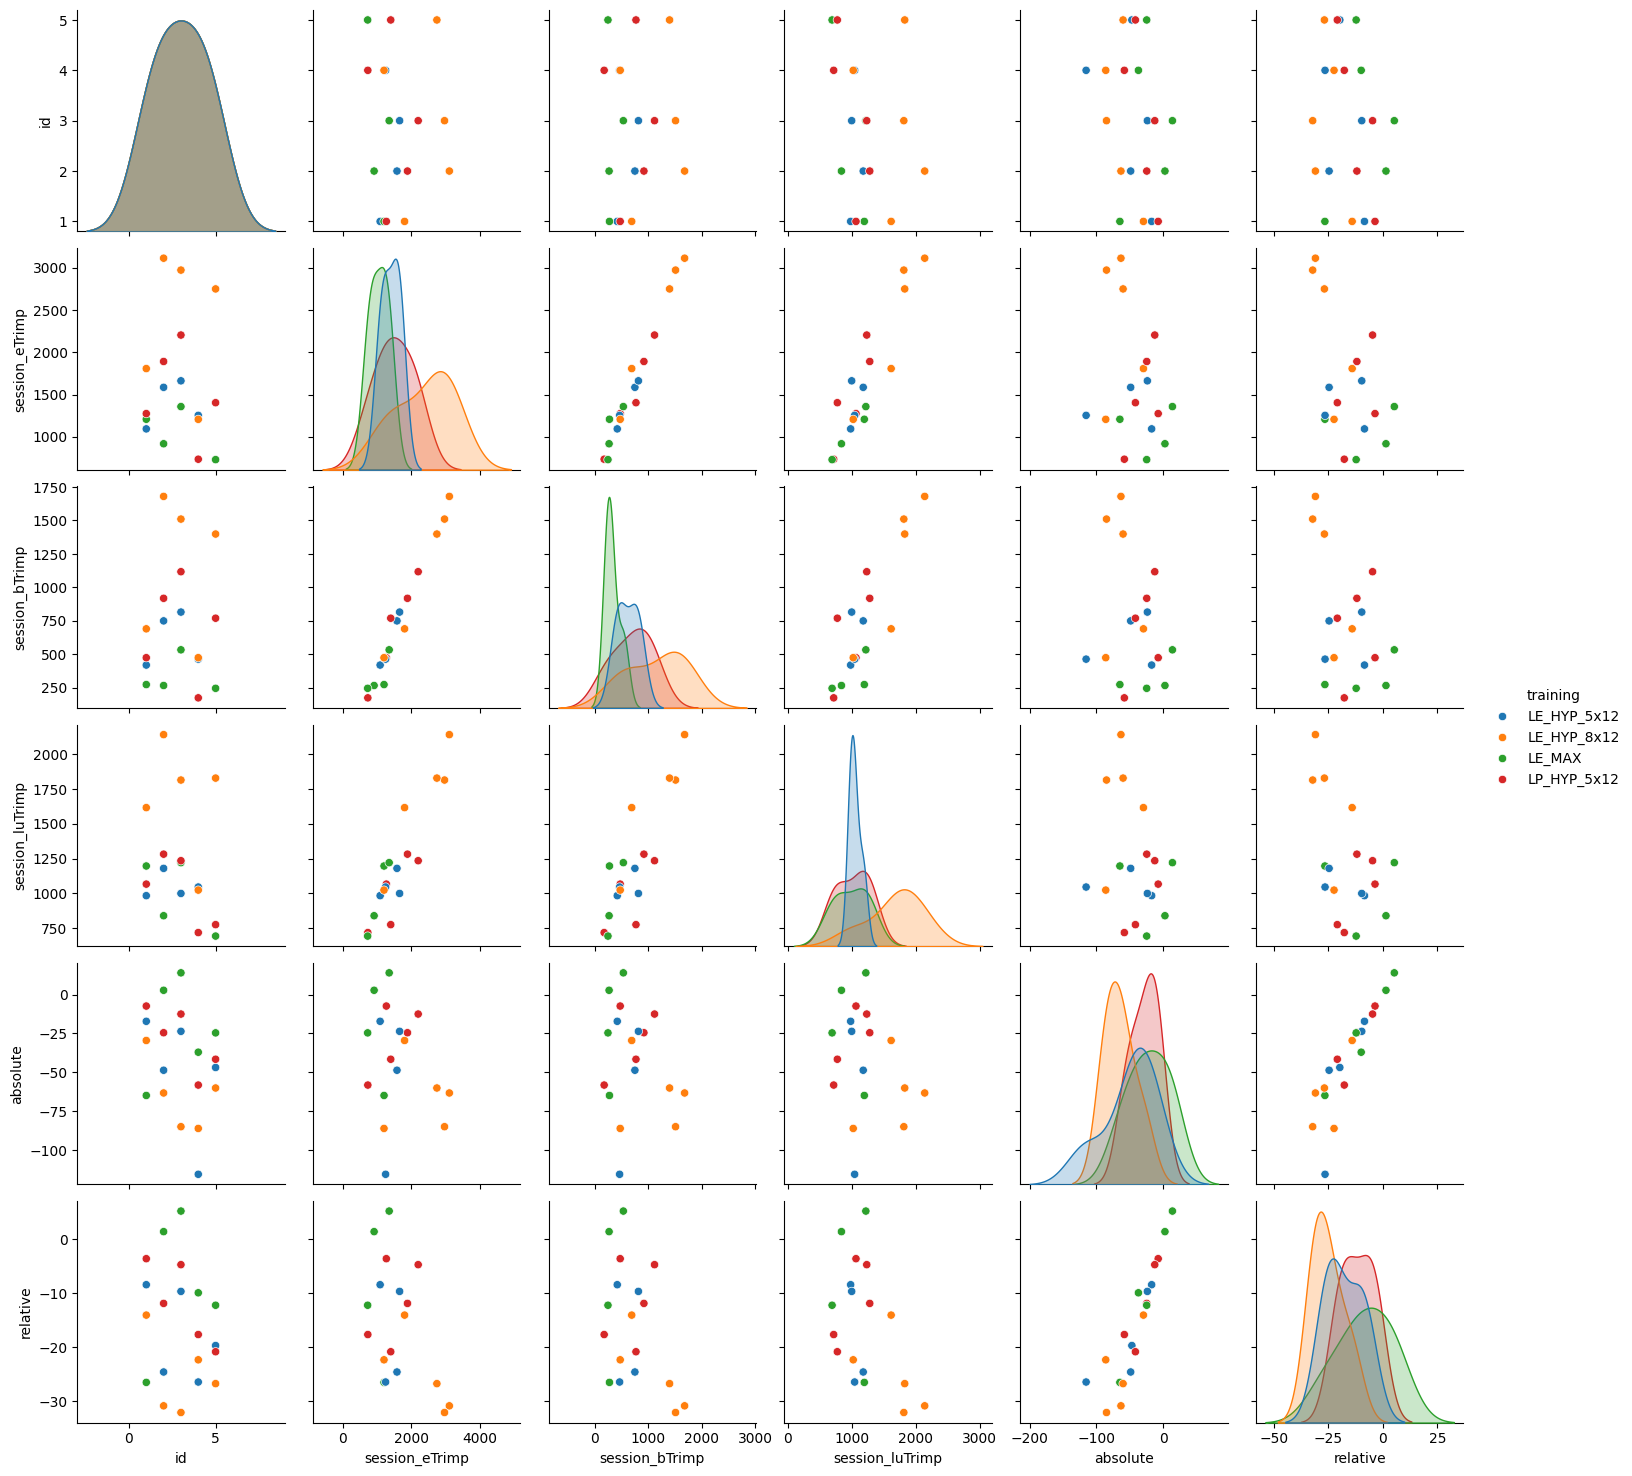

In [4]:
output = merged_df.merge(df_to_write, on=['id','training'], how='right')
output.to_csv('final.csv')

sns.pairplot(output, hue='training')

<Axes: >

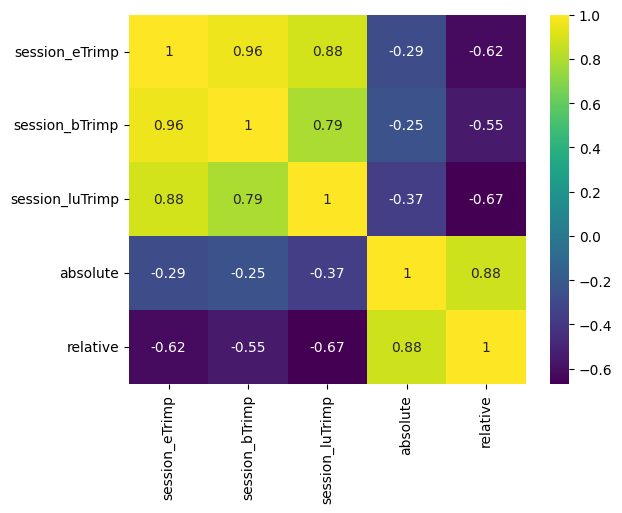

In [5]:
output = output[output['training'] != 'LP_HYP_5x12']
filtered = output.drop(columns=['training', 'id'])
corr_df = filtered.corr(method='spearman')
sns.heatmap(corr_df, annot=True, cmap=('viridis'))

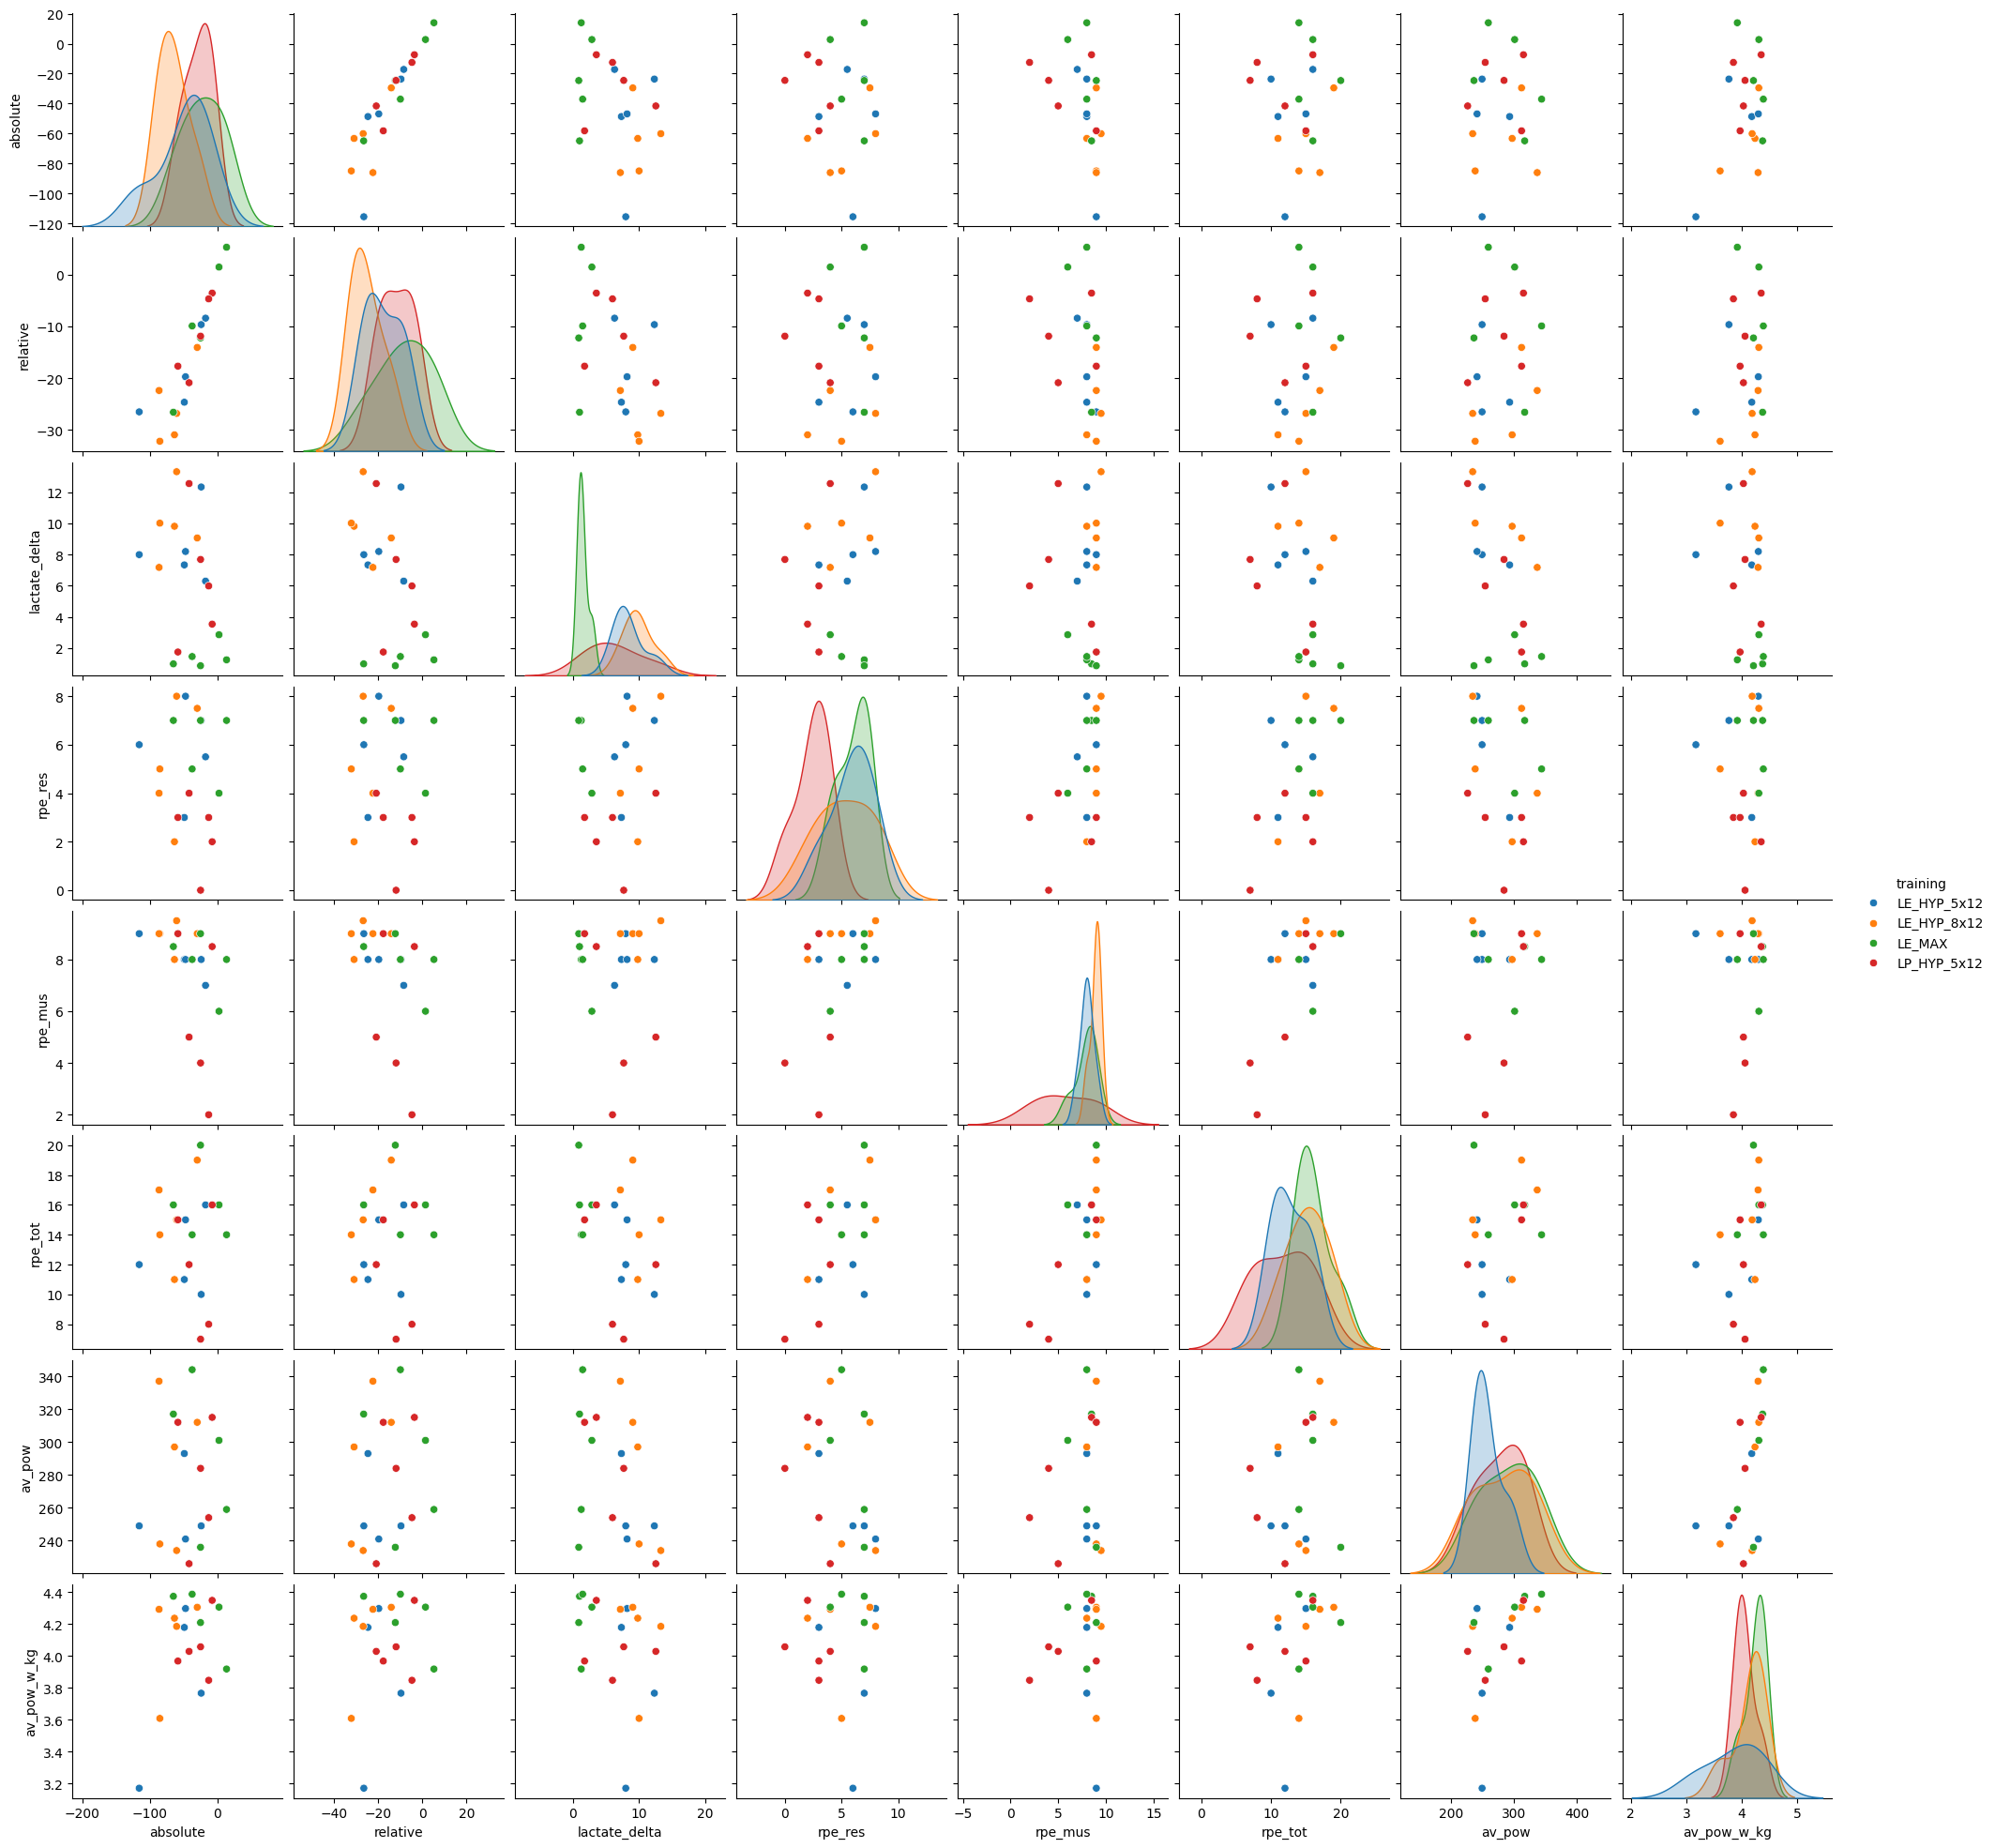

In [6]:
df_giant = pd.read_csv('giant.csv', delimiter=';')
filtered = df_giant.drop(columns=['traning(id)', 'ID', 'session_eTrimp', 'session_luTrimp', 'session_bTrimp'])
sns.pairplot(filtered, hue='training')


Index(['absolute', 'relative', 'lactate_delta', 'av_pow', 'av_pow_w_kg'], dtype='object')


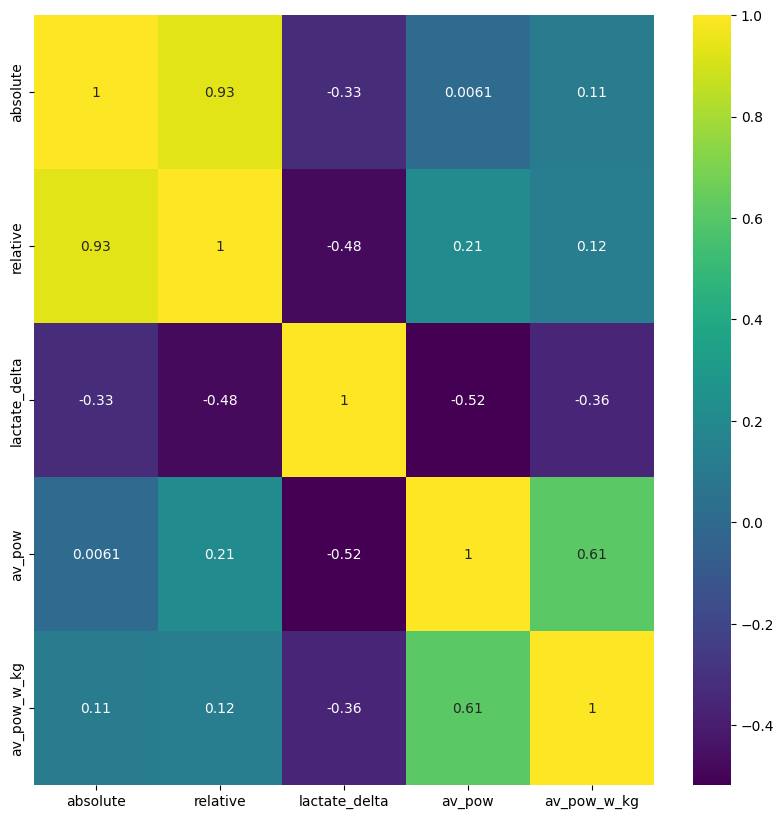

In [7]:
filtered = df_giant.drop(columns=['training', 'traning(id)', 'ID', 'session_eTrimp', 'session_luTrimp', 'session_bTrimp','rpe_res', 'rpe_mus',
       'rpe_tot'])
corr_df = filtered.corr(method='spearman')
plt.figure(figsize=(10,10))
sns.heatmap(corr_df, annot=True, cmap=('viridis'))
print(filtered.columns)